In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

from tabulate import tabulate

C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
transactions = pd.read_csv("QVI_transaction_data.csv")
customers = pd.read_csv("QVI_purchase_behaviour.csv")

In [3]:
transactions.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [4]:
customers.head(20)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


# Merge Data

In [5]:
df = pd.merge(transactions, customers, on="LYLTY_CARD_NBR", how="inner")

In [6]:
df.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,MIDAGE SINGLES/COUPLES,Budget
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,MIDAGE SINGLES/COUPLES,Budget
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,MIDAGE SINGLES/COUPLES,Budget


# Check Missing Values

In [7]:
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

# Feature Engineering

In [8]:
df['pack_size'] = df['PROD_NAME'].str.extract(r'(\d+)').astype(float)
df['brand'] = df['PROD_NAME'].str.extract(r'^([\D]+?)\s*\d')
df['brand'] = df['brand'].str.strip()

In [9]:
df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,pack_size,brand
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175.0,Natural Chip Compny SeaSalt
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175.0,CCs Nacho Cheese
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170.0,Smiths Crinkle Cut Chips Chicken
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175.0,Smiths Chip Thinly S/Cream&Onion
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150.0,Kettle Tortilla ChpsHny&Jlpno Chili
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,300.0,Old El Paso Salsa Dip Tomato Mild
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,330.0,Smiths Crinkle Chips Salt & Vinegar
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,MIDAGE SINGLES/COUPLES,Budget,210.0,Grain Waves Sweet Chilli
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,MIDAGE SINGLES/COUPLES,Budget,150.0,Doritos Corn Chip Mexican Jalapeno
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,MIDAGE SINGLES/COUPLES,Budget,210.0,Grain Waves Sour Cream&Chives


In [10]:
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,pack_size
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,182.427004
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,64.327196
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,150.000000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,170.000000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,175.000000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


# Detecting and handling outliers

In [11]:
numeric_columns = ['PROD_QTY', 'TOT_SALES']
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [12]:
# Metrics for customer segments
customer_spending = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg({
    "TOT_SALES": "sum",  # Total spending
    "PROD_QTY": "sum",  # Total quantity purchased
    "LYLTY_CARD_NBR": "nunique"  # Unique customer count
}).reset_index()


# Average Spend Per Customer

In [13]:
customer_spending["avg_spend_per_customer"] = customer_spending["TOT_SALES"] / customer_spending["LYLTY_CARD_NBR"]

# Visualize Customer Segment

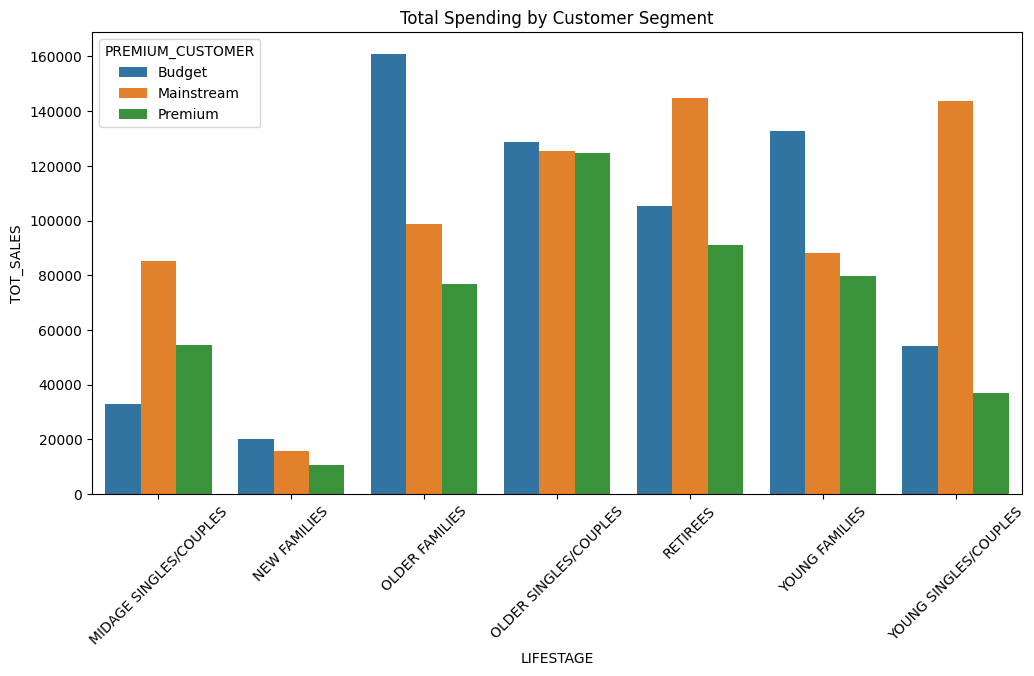

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=customer_spending, x="LIFESTAGE", y="TOT_SALES", hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=45)
plt.title("Total Spending by Customer Segment")
plt.show()

# Top Segment Table

In [15]:
top_segments = customer_spending.sort_values(by="TOT_SALES", ascending=False).head(5)
print("Top spending customer segments:")
print("     ")
print(tabulate(top_segments, headers='keys', tablefmt='grid'))

Top spending customer segments:
     
+----+-----------------------+--------------------+-------------+------------+------------------+--------------------------+
|    | LIFESTAGE             | PREMIUM_CUSTOMER   |   TOT_SALES |   PROD_QTY |   LYLTY_CARD_NBR |   avg_spend_per_customer |
+====+=======================+====================+=============+============+==================+==========================+
|  6 | OLDER FAMILIES        | Budget             |      160873 |      43028 |             4203 |                  38.2758 |
+----+-----------------------+--------------------+-------------+------------+------------------+--------------------------+
| 13 | RETIREES              | Mainstream         |      144864 |      37562 |             5578 |                  25.9707 |
+----+-----------------------+--------------------+-------------+------------+------------------+--------------------------+
| 19 | YOUNG SINGLES/COUPLES | Mainstream         |      143792 |      35152 |         

In [16]:
# Saving visualizations
plt.savefig("customer_segment_spending.png")

<Figure size 640x480 with 0 Axes>